<a href="https://colab.research.google.com/github/AnusreeMandal/SoftComputing_Lab/blob/main/Housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('train_housing_price.csv')
test_data = pd.read_csv('test_housing_price.csv')

In [ ]:
# Imputing missing values
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train_data.select_dtypes(include=['object']).columns

In [ ]:
# Using median for numerical columns
num_imputer = SimpleImputer(strategy='median')

# Fit on training data (excluding 'SalePrice')
num_cols_train = num_cols.drop('SalePrice')
train_data[num_cols_train] = num_imputer.fit_transform(train_data[num_cols_train])

# Transform test data (excluding 'SalePrice')
num_cols_test = num_cols.drop('SalePrice')
test_data[num_cols_test] = num_imputer.transform(test_data[num_cols_test])

In [ ]:
# Use most frequent (mode) for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[cat_cols] = cat_imputer.fit_transform(train_data[cat_cols])
test_data[cat_cols] = cat_imputer.transform(test_data[cat_cols])

In [ ]:
print("Training Data after Handling Missing Values:")
print(train_data.head())


print("\nTest Data after Handling Missing Values:")
print(test_data.head())

Training Data after Handling Missing Values:
    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1.0        60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1  2.0        20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2  3.0        60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3  4.0        70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4  5.0        60.0       RL         84.0  14260.0   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
1         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
2         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
3         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
4         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice 

In [ ]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
            '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'Neighborhood']

X_train = train_data[features]
y_train = train_data['SalePrice']
X_test = test_data[features]

In [ ]:
# Encode categorical data
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Ensure the same columns in both training and test set
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

In [ ]:
# Normalization (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Split the training data for validation
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train_split, y_train_split)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# Plot training and validation loss
train_preds = model.predict(X_train_split)
valid_preds = model.predict(X_valid_split)

In [ ]:
train_loss = ((train_preds - y_train_split) ** 2).mean()
valid_loss = ((valid_preds - y_valid_split) ** 2).mean()


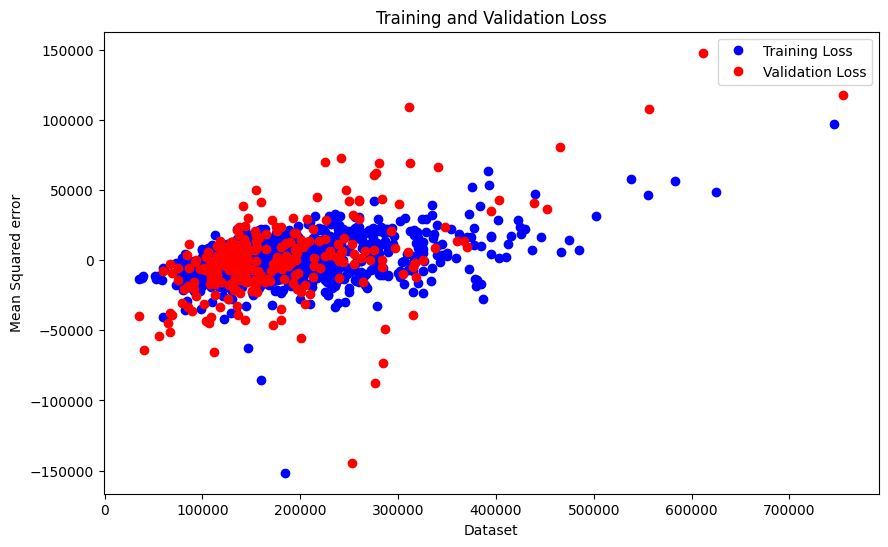

Training Loss: 193284963.49884287
Validation Loss: 825595664.130364


In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_train_split, y_train_split - train_preds, 'bo', label='Training Loss')
plt.plot(y_valid_split, y_valid_split - valid_preds, 'ro', label='Validation Loss')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()
print(f'Training Loss: {train_loss}')
print(f'Validation Loss: {valid_loss}')


since there is a huge difference in the training and validation loss it means overfitting exists.
